In [ ]:
from sklearn.datasets import fetch_california_housing
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import norm, kurtosis, skew

In [ ]:
df = fetch_california_housing(as_frame=True)['frame']
df.head()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,3.585
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,3.521
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,3.413
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,3.422


In [ ]:
df.tail()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
20635,1.5603,25.0,5.045455,1.133333,845.0,2.560606,39.48,-121.09,0.781
20636,2.5568,18.0,6.114035,1.315789,356.0,3.122807,39.49,-121.21,0.771
20637,1.7000,17.0,5.205543,1.120092,1007.0,2.325635,39.43,-121.22,0.923
20638,1.8672,18.0,5.329513,1.171920,741.0,2.123209,39.43,-121.32,0.847
20639,2.3886,16.0,5.254717,1.162264,1387.0,2.616981,39.37,-121.24,0.894


In [ ]:
df.shape

(20640, 9)

In [ ]:
df.isna().mean()*100

,0
MedInc,0.0
HouseAge,0.0
AveRooms,0.0
AveBedrms,0.0
Population,0.0
AveOccup,0.0
Latitude,0.0
Longitude,0.0
MedHouseVal,0.0


In [ ]:
df.dtypes

,0
MedInc,float64
HouseAge,float64
AveRooms,float64
AveBedrms,float64
Population,float64
AveOccup,float64
Latitude,float64
Longitude,float64
MedHouseVal,float64


In [ ]:
df.nunique()

,0
MedInc,12928
HouseAge,52
AveRooms,19392
AveBedrms,14233
Population,3888
AveOccup,18841
Latitude,862
Longitude,844
MedHouseVal,3842


# Describe: Coeficiente de variación

- Fondo A: Rentabilidad media 10% Desviación de un 2%

- Fondo B: Rentabilidad media 5% Desviación de un 2%

- CV_Fondo_A: 20%

- CV_Fondo_B: 40% -> Mayor volatilidad.



In [ ]:
desc = df.describe().T
desc['CV'] = desc['std']/desc['mean']*100
desc

,count,mean,std,min,25%,50%,75%,max,CV
MedInc,20640.0,3.870671,1.899822,0.499900,2.563400,3.534800,4.743250,15.000100,49.082490
HouseAge,20640.0,28.639486,12.585558,1.000000,18.000000,29.000000,37.000000,52.000000,43.944774
AveRooms,20640.0,5.429000,2.474173,0.846154,4.440716,5.229129,6.052381,141.909091,45.573278
AveBedrms,20640.0,1.096675,0.473911,0.333333,1.006079,1.048780,1.099526,34.066667,43.213422
Population,20640.0,1425.476744,1132.462122,3.000000,787.000000,1166.000000,1725.000000,35682.000000,79.444447
AveOccup,20640.0,3.070655,10.386050,0.692308,2.429741,2.818116,3.282261,1243.333333,338.235621
Latitude,20640.0,35.631861,2.135952,32.540000,33.930000,34.260000,37.710000,41.950000,5.994501
Longitude,20640.0,-119.569704,2.003532,-124.350000,-121.800000,-118.490000,-118.010000,-114.310000,-1.675618
MedHouseVal,20640.0,2.068558,1.153956,0.149990,1.196000,1.797000,2.647250,5.000010,55.785531


In [ ]:
df[df['AveOccup']==df['AveOccup'].max()]

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
19006,10.2264,45.0,3.166667,0.833333,7460.0,1243.333333,38.32,-121.98,1.375


# Correlación

In [ ]:
# Calculamos la matriz de correlación
corr = df.corr()
corr

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
MedInc,1.000000,-0.119034,0.326895,-0.062040,0.004834,0.018766,-0.079809,-0.015176,0.688075
HouseAge,-0.119034,1.000000,-0.153277,-0.077747,-0.296244,0.013191,0.011173,-0.108197,0.105623
AveRooms,0.326895,-0.153277,1.000000,0.847621,-0.072213,-0.004852,0.106389,-0.027540,0.151948
AveBedrms,-0.062040,-0.077747,0.847621,1.000000,-0.066197,-0.006181,0.069721,0.013344,-0.046701
Population,0.004834,-0.296244,-0.072213,-0.066197,1.000000,0.069863,-0.108785,0.099773,-0.024650
AveOccup,0.018766,0.013191,-0.004852,-0.006181,0.069863,1.000000,0.002366,0.002476,-0.023737
Latitude,-0.079809,0.011173,0.106389,0.069721,-0.108785,0.002366,1.000000,-0.924664,-0.144160
Longitude,-0.015176,-0.108197,-0.027540,0.013344,0.099773,0.002476,-0.924664,1.000000,-0.045967
MedHouseVal,0.688075,0.105623,0.151948,-0.046701,-0.024650,-0.023737,-0.144160,-0.045967,1.000000


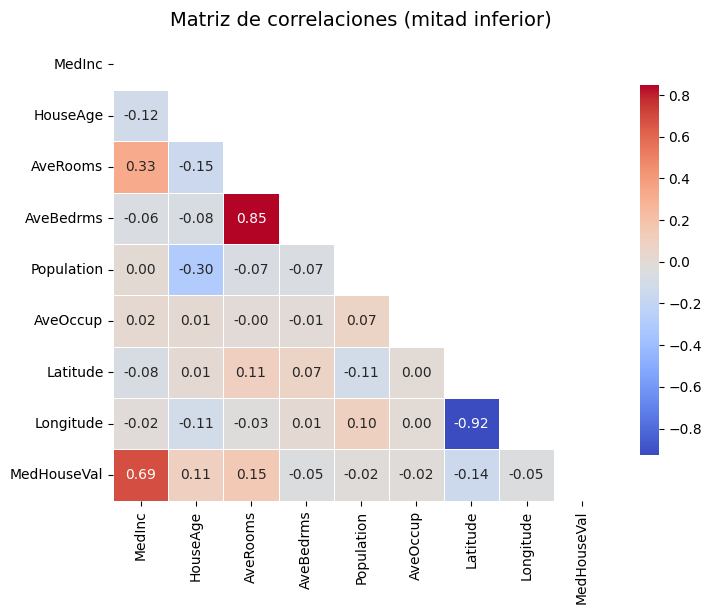

In [ ]:
# Creamos una máscara para ocultar la mitad superior
mask = np.triu(np.ones_like(corr, dtype=bool))

# Configuramos el tamaño del gráfico
plt.figure(figsize=(8, 6))

# Mapa de calor de la mitad inferior
sns.heatmap(corr, mask=mask, cmap='coolwarm', annot=True, fmt=".2f",
            linewidths=.5, cbar_kws={"shrink": .8})

plt.title("Matriz de correlaciones (mitad inferior)", fontsize=14, pad=10)
plt.show()

In [ ]:
corr['MedHouseVal']

,MedHouseVal
MedInc,0.688075
HouseAge,0.105623
AveRooms,0.151948
AveBedrms,-0.046701
Population,-0.024650
AveOccup,-0.023737
Latitude,-0.144160
Longitude,-0.045967
MedHouseVal,1.000000


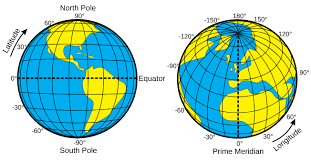

# Skew y Kurtosis



In [ ]:
print(f'Kurtosis de una distribución normal: {kurtosis(norm.rvs(size=1000))}')
print(f'Skew de una distribución normal: {skew(norm.rvs(size=1000))}')

Kurtosis de una distribución normal: 0.06745030272964625
Skew de una distribución normal: 0.03975561540218588


In [ ]:
df.apply(['kurtosis','skew','mean'])

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,MedHouseVal
kurtosis,4.952524,-0.800629,879.353264,1636.711972,73.553116,10651.010636,-1.117760,-1.330152,0.327870
skew,1.646657,0.060331,20.697869,31.316956,4.935858,97.639561,0.465953,-0.297801,0.977763
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558


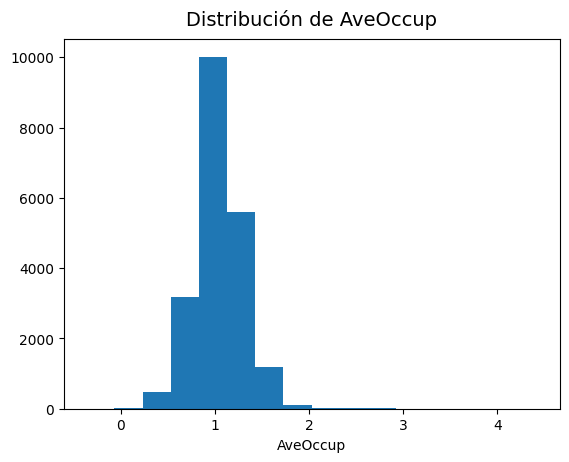

In [ ]:
df1 = df[df['AveOccup']<100].copy()
plt.hist(np.log(df1.AveOccup),bins='sturges')
plt.title("Distribución de AveOccup", fontsize=14, pad=10)
plt.xlabel("AveOccup")
plt.ylabel("")
plt.show()
plt.show()